# Student Performance Analysis

## Table of Content
1.[Problem Statement](#section1)<br>

2.[Importing Packages and Dataset](#section2)

3.[Data Profiling](#section3)
  - 3.1 [Understanding the Dataset](#section301)<br/>
  - 3.2 [Pre Profiling](#section302)<br/>
  - 3.3 [Preprocessing](#section303)<br/>
  - 3.4 [Post Profiling](#section304)<br/>
  
4.[EDA](#section4)<br>
  - 4.1 [Final Grade Distribution](#section401)<br/>
  - 4.2 [Correlation Heatmap](#section402)<br/>
  - 4.3 [Romantic Status](#section403)<br/>
  - 4.4 [Alcohol Consumption](#section404)<br/>
  - 4.5 [Parents Education Level](#section405)<br/>
  - 4.6 [Frequency Of Going Out](#section406)<br/>
  - 4.7 [Desire Of Higher Education](#section407)<br/>
  - 4.8 [Urban Vs. Rural Students](#section408)<br/>
  
5.[Conclusions](#section5)<br>
    

# 1.Problem Statement

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).

I have classified these students into three categories, "good", "fair", and "poor", according to their final exam performance. Then I analyzed a few features that have significant influence on students' final performance, including Romantic Status, Alcohol Consumption, Parents Education Level, Frequency Of Going Out, Desire Of Higher Education and Living Area. 

![kids](https://user-images.githubusercontent.com/32555702/37250835-ffa33bcc-24b9-11e8-8b0f-f5275640cd27.png)

### 2.Importing Packages

In [1]:
import numpy as np                      
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import statsmodels.api as sm
from subprocess import check_output

### Importing Dataset

In [3]:
# loading datasets for two subjects, Math and Portuguese
student_mat = pd.read_csv("Desktop/student_info/student-mat.csv", sep=';')
student_por = pd.read_csv("Desktop/student_info/student-por.csv", sep=';')

In [4]:
# merge datasets
df = pd.concat([student_mat,student_por])

In [5]:
type(df)

pandas.core.frame.DataFrame

# 3. Data Profiling

- In the upcoming sections, we will begin by utilizing various pandas functionalities to gain a comprehensive understanding of our dataset. 
- Following that, we will employ pandas profiling to identify the columns in our dataset that require preprocessing. 
- During the preprocessing stage, we will address erroneous and missing values in these columns. 
- Lastly, we will generate another pandas profiling report to assess the transformation brought about by the preprocessing steps in our dataset.

### 3.1 Understanding the Dataset

To extract valuable insights from the data, it is essential to thoroughly examine each aspect of it. We will initiate this process by carefully observing a few rows and columns of data, starting from the beginning and also from the end.


In [7]:
df.shape

(1044, 33)

Data has __1044 rows__ and __33 columns.__

In [8]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
# Sample data from top
df.head(5)

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

In [10]:
#sample data from bottom
df.tail(5)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[5 rows x 33 columns]

In [11]:
df.info() # information about index, datatype & memory

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [12]:
df.describe()

age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.152575     0.911714   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%       0.000000     4.000000     3.000000     2.000000     1.000000   
50%       0.000000     4.000000     3.000000     3.000000     1.000000   
75%       0.000000     5.000000     4.000000     4.000000     2.000000   
max       3.000000     5.000000     5.000000     5.000000     5.000000   

              Walc       health     absences           G1           G2  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      2.284483     3.543103     4.434866    11.213602    11.246169   
std       1.285105     1.424703     6.210017     2.983394     3.285071   
min       1.000000     1.000000     0.000000     0.000000     0.000000   
25%       1.000000     3.000000     0.000000     9.000000     9.000000   
50%       2.000000     4.000000     2.000000    11.000000    11.000000   
75%       3.000000     5.000000     6.000000    13.000000    13.000000   
max       5.000000     5.000000    75.000000    19.000000    19.000000   

                G3  
count  1044.000000  
mean     11.341954  
std       3.864796  
min       0.000000  
25%      10.000000  
50%      11.000000  
75%      14.000000  
max      20.000000

In [13]:
df.isnull().sum() # checking for Nan values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

### 3.2 Pre Profiling

- Pandas profiling generates an interactive HTML report that provides comprehensive information about the dataset columns, including counts and data types. 
- It offers detailed insights into each column, such as correlations with other columns and a sample of the dataset.
- The report facilitates visual interpretation of each column through distribution plots, enabling a better understanding of data spread. 
- Furthermore, it allows for a granular level analysis of each column, providing in-depth exploration of its characteristics.

In [10]:
profile = ProfileReport(df,title="pandas profiling Report")
profile.to_file(output_file="df_before_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ydata_profiling\model\correlations.py:72: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex from a duplicate axis')
  (include the error message: '{error}')"""


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
profile

Here, we have done Pandas Profiling before preprocessing our dataset. Take a look at the file and see what useful insight we can develop from it. <br/>
Now we will process our data to better understand it.

### 3.3 Preprocessing

 - Renamening the columns
 - Need to create G3 column as categorical variables as good,fair and poor

In [14]:
 #rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [15]:
df.head(5)

school sex  age address family_size parents_status  mother_education  \
0     GP   F   18       U         GT3              A                 4   
1     GP   F   17       U         GT3              T                 1   
2     GP   F   15       U         LE3              T                 1   
3     GP   F   15       U         GT3              T                 4   
4     GP   F   16       U         GT3              T                 3   

   father_education mother_job father_job  ... family_quality free_time  \
0                 4    at_home    teacher  ...              4         3   
1                 1    at_home      other  ...              5         3   
2                 1    at_home      other  ...              4         3   
3                 2     health   services  ...              3         2   
4                 3      other      other  ...              4         3   

   go_out  weekday_alcohol_usage  weekend_alcohol_usage health absences  \
0       4                      1                      1      3        6   
1       3                      1                      1      3        4   
2       2                      2                      3      3       10   
3       2                      1                      1      5        2   
4       2                      1                      2      5        4   

  period1_score period2_score final_score  
0             5             6           6  
1             5             5           6  
2             7             8          10  
3            15            14          15  
4             6            10          10  

[5 rows x 33 columns]

Performing Feature Engineering to convert final_score to categorical varialbes (Good, Fair, Poor) 


In [16]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

school sex  age address family_size parents_status  mother_education  \
0     GP   F   18       U         GT3              A                 4   
1     GP   F   17       U         GT3              T                 1   
2     GP   F   15       U         LE3              T                 1   
3     GP   F   15       U         GT3              T                 4   
4     GP   F   16       U         GT3              T                 3   

   father_education mother_job father_job  ... free_time go_out  \
0                 4    at_home    teacher  ...         3      4   
1                 1    at_home      other  ...         3      3   
2                 1    at_home      other  ...         3      2   
3                 2     health   services  ...         2      2   
4                 3      other      other  ...         3      2   

   weekday_alcohol_usage  weekend_alcohol_usage  health absences  \
0                      1                      1       3        6   
1                      1                      1       3        4   
2                      2                      3       3       10   
3                      1                      1       5        2   
4                      1                      2       5        4   

  period1_score period2_score final_score final_grade  
0             5             6           6        poor  
1             5             5           6        poor  
2             7             8          10        fair  
3            15            14          15        good  
4             6            10          10        fair  

[5 rows x 34 columns]

## 3.4 Post Pandas Profiling

In [15]:
post_profile = ProfileReport(df,title="pandas profiling Report after processing")
post_profile.to_file(output_file="df_after_preprocessing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ydata_profiling\model\correlations.py:72: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'cannot reindex from a duplicate axis')
  (include the error message: '{error}')"""


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
post_profile

Now we have preprocessed the data, now the dataset doesnot contain missing values, we have also introduced new feature named __Final_grade__. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __df_after_preprocessing.html__ and df_before_preprocessing.html.<br/>
In df_after_preprocessing.html report, observations: 
- Number of __variables__ = __34__ 
- Observe the newly created variable Final_grade, Click on Toggle details to get more detailed information about it.

# 4. EDA

### 4.1 Final Grade Distribution

Text(0, 0.5, 'Number of Student')

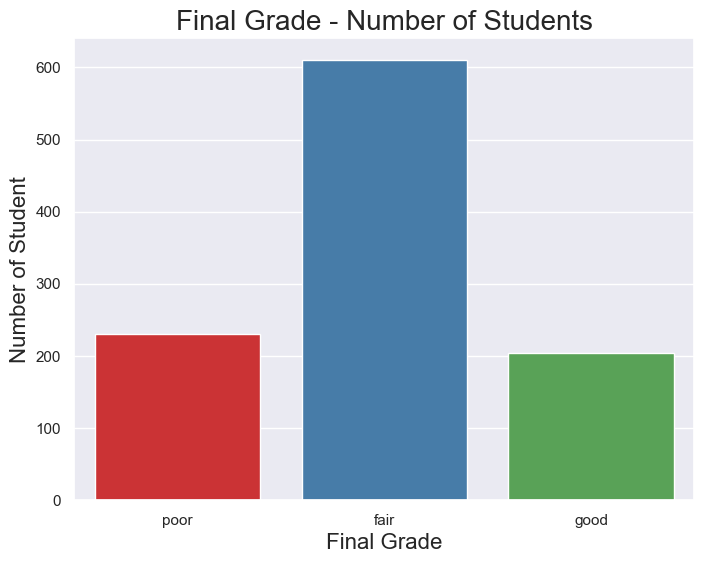

In [16]:
 #Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='final_grade', order=("poor","fair","good"), palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)


- The majority of students have received a grade of _Fair_

### 4.2 Correlation Heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

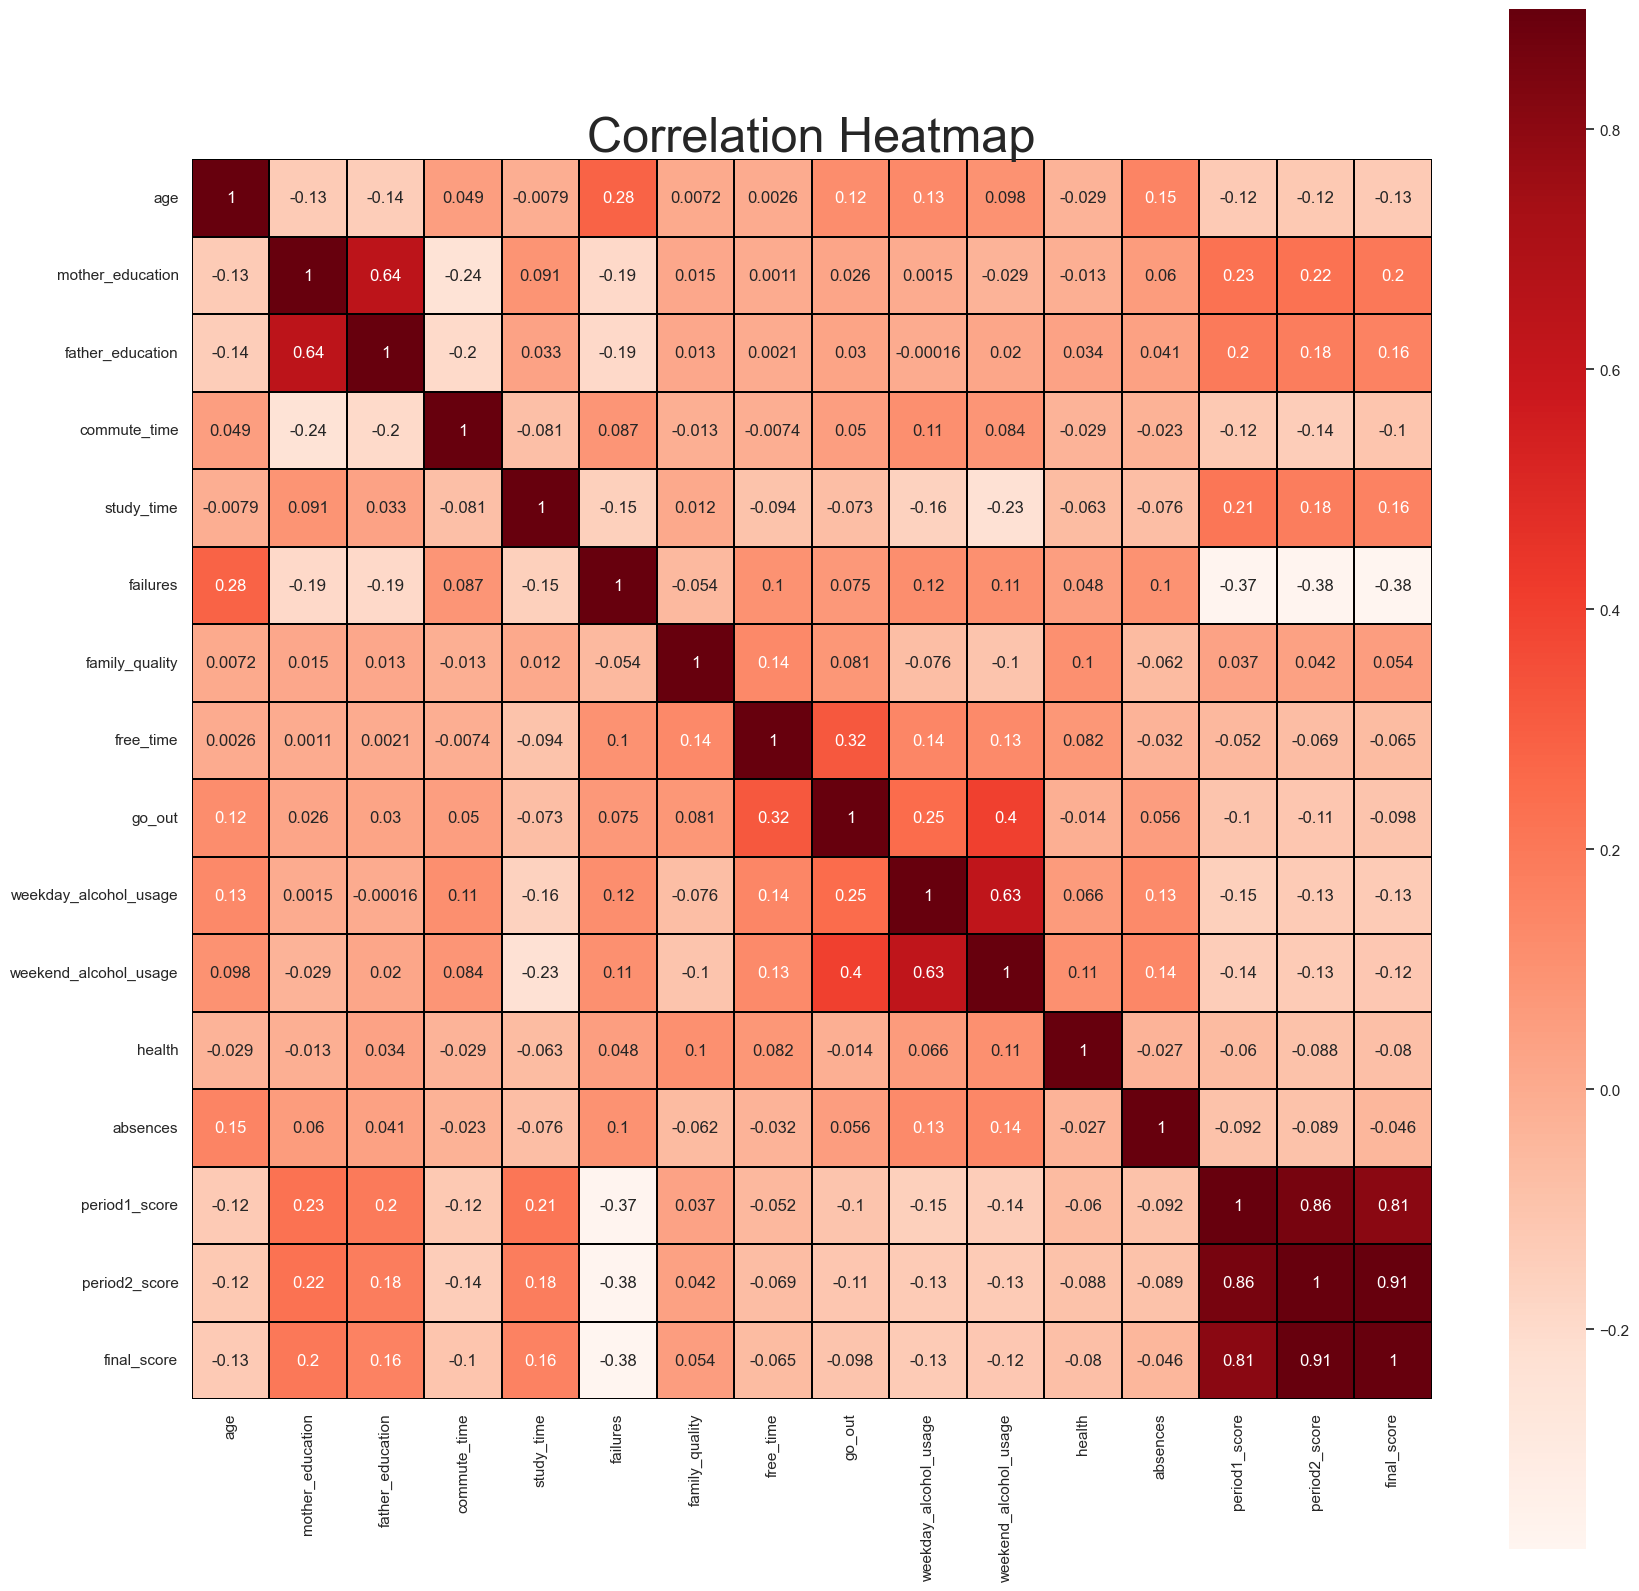

In [17]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=.9, linewidth=0.01, square= True, annot=True, cmap='Reds', linecolor='black')
plt.title('Correlation Heatmap', fontsize=35)

- _final_score, period_score._ are _negatively._ correlated with _failure._
- _period_score._ are _positively._ correlated with _final_score._
- _mothers_edu, fathers_edu._ have _positive effect on _final_score._

# 4.3 Final Grade By Romantic Status

see how students in a romantic relationship vs. those not in a relationship perform.

In [19]:
# romantic status
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

<Figure size 640x480 with 0 Axes>

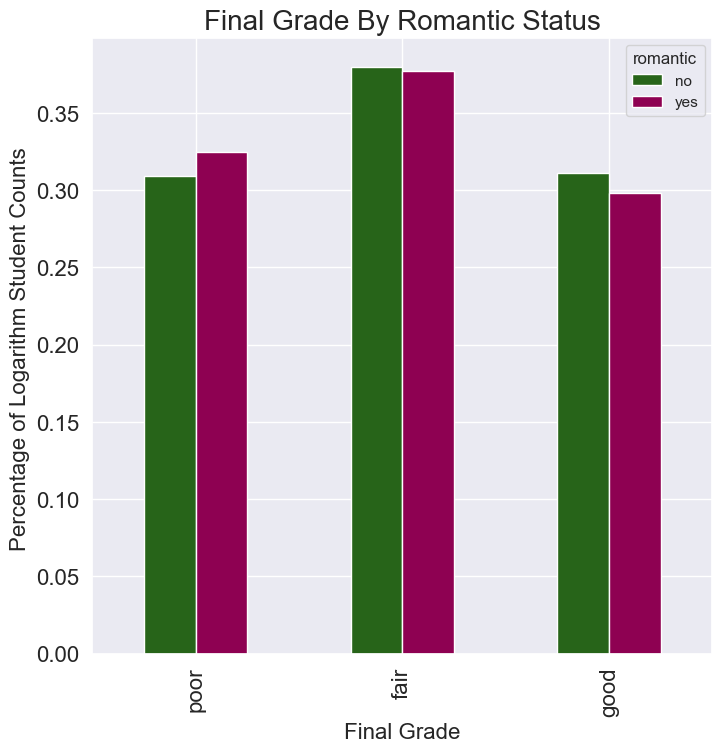

In [20]:
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

- The romantic status exhibits a noteworthy correlation with the final grade.
- A majority of the students do not have a romantic status


### 4.4 Final Grade By Alcohol Consumption

 See how alcohol consumption influences students' final grade

In [21]:
# weekend alcohol consumption
alc_tab1 = pd.crosstab(index=df.final_grade, columns=df.weekend_alcohol_usage)
alc_tab = np.log(alc_tab1)
alc_perc = alc_tab.apply(perc).reindex(index)

c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 

`shade` is now deprecated in

Text(0.5, 0, 'Level of Alcohol Consumption')

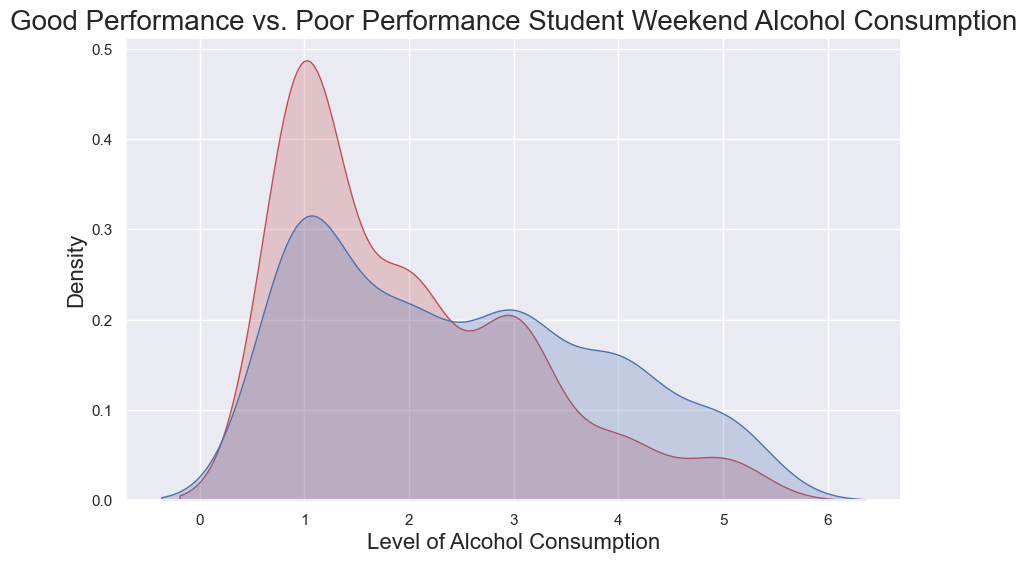

In [22]:
# create good student dataframe
good = df.loc[df.final_grade == 'good']
good['good_alcohol_usage']=good.weekend_alcohol_usage
# create poor student dataframe
poor = df.loc[df.final_grade == 'poor']
poor['poor_alcohol_usage']=poor.weekend_alcohol_usage

plt.figure(figsize=(10,6))
p1=sns.kdeplot(good['good_alcohol_usage'], shade=True, color="r")
p1=sns.kdeplot(poor['poor_alcohol_usage'], shade=True, color="b")
plt.title('Good Performance vs. Poor Performance Student Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Density', fontsize=16)
plt.xlabel('Level of Alcohol Consumption', fontsize=16)

Text(0.5, 0, 'Final Grade')

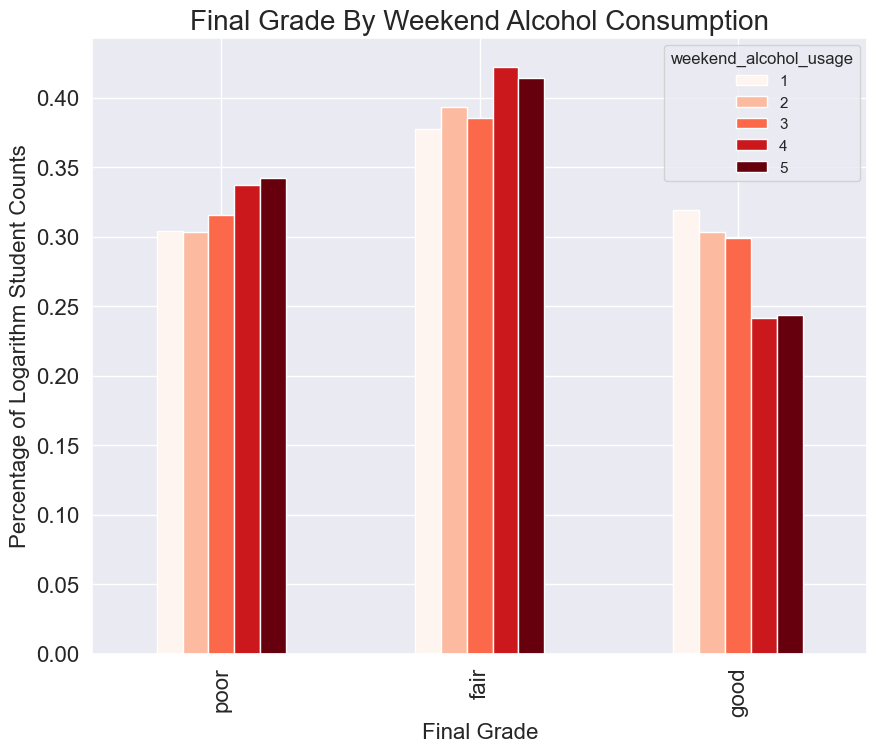

In [23]:
alc_perc.plot.bar(colormap="Reds", figsize=(10,8), fontsize=16)
plt.title('Final Grade By Weekend Alcohol Consumption', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

- Weekend alcohol consumption demonstrates a notable correlation with the final grade
- The majority of students have an alcohol consumption level of one
- We can also observe that students who perform well academically tend to have lower alcohol consumption levels, whereas students with poor or fair academic performance have higher levels of alcohol consumption.

### 4.5 Final Grade By Parents Education Level

see how parents' education level influence student performance

In [25]:
good['good_student_father_education'] = good.father_education
poor['poor_student_father_education'] = poor.father_education
good['good_student_mother_education'] = good.mother_education
poor['poor_student_mother_education'] = poor.mother_education

c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  after removing the cwd from sys.path.


Text(0.5, 0, 'Father Education Level')

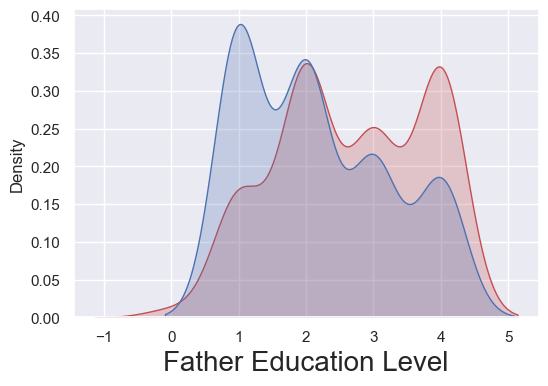

In [26]:
#see the difference between good and poor performers' father education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p2=sns.kdeplot(good['good_student_father_education'], shade=True, color="r")
p2=sns.kdeplot(poor['poor_student_father_education'], shade=True, color="b")
plt.xlabel('Father Education Level', fontsize=20)

- The educational background of the father directly influences the academic performance of the student

c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\nagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  after removing the cwd from sys.path.


Text(0.5, 0, 'Mother Education Level')

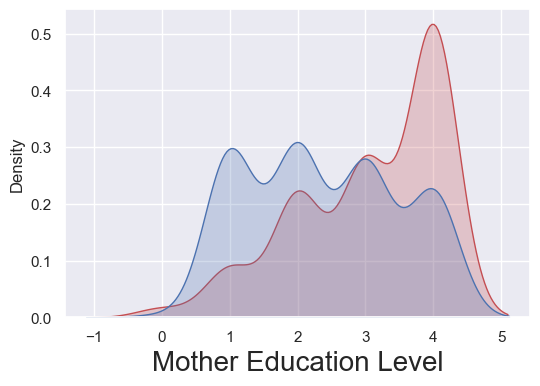

In [28]:
# see the difference between good and poor performers' mother education level(numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,4))
p3=sns.kdeplot(good['good_student_mother_education'], shade=True, color="r")
p3=sns.kdeplot(poor['poor_student_mother_education'], shade=True, color="b")
plt.xlabel('Mother Education Level', fontsize=20)

- The educational attainment of the mother plays a crucial role in facilitating high academic performance among students 
- When comparing the educational backgrounds of both fathers and mothers, it becomes evident that the academic performance of students is greatly influenced by the mother's level of education.

### 4.6 Final Grade By Frequency Of Going Out

See how frequency of goig out with friend influence students' final performance

Text(0.5, 0, 'Frequency of Going Out')

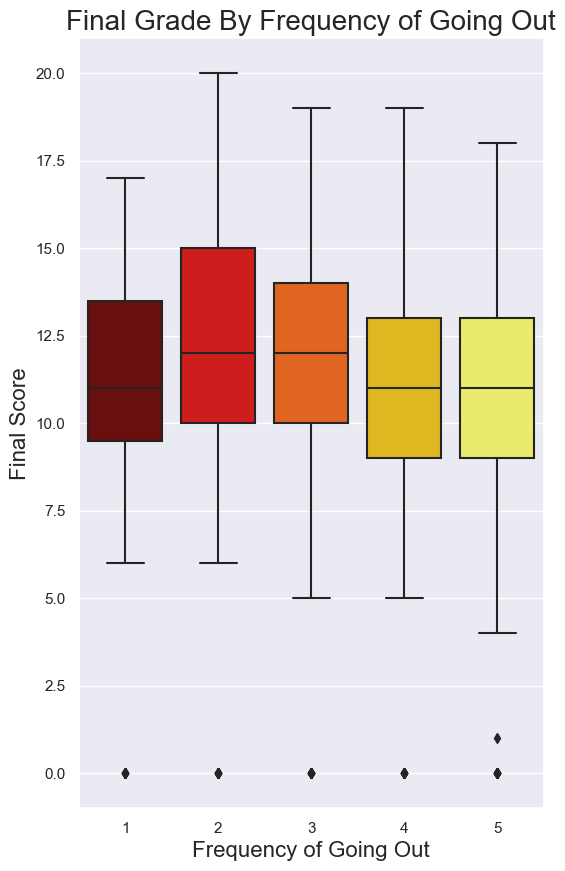

In [30]:
# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='final_score', data=df, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

Text(0.5, 0, 'Final Grade')

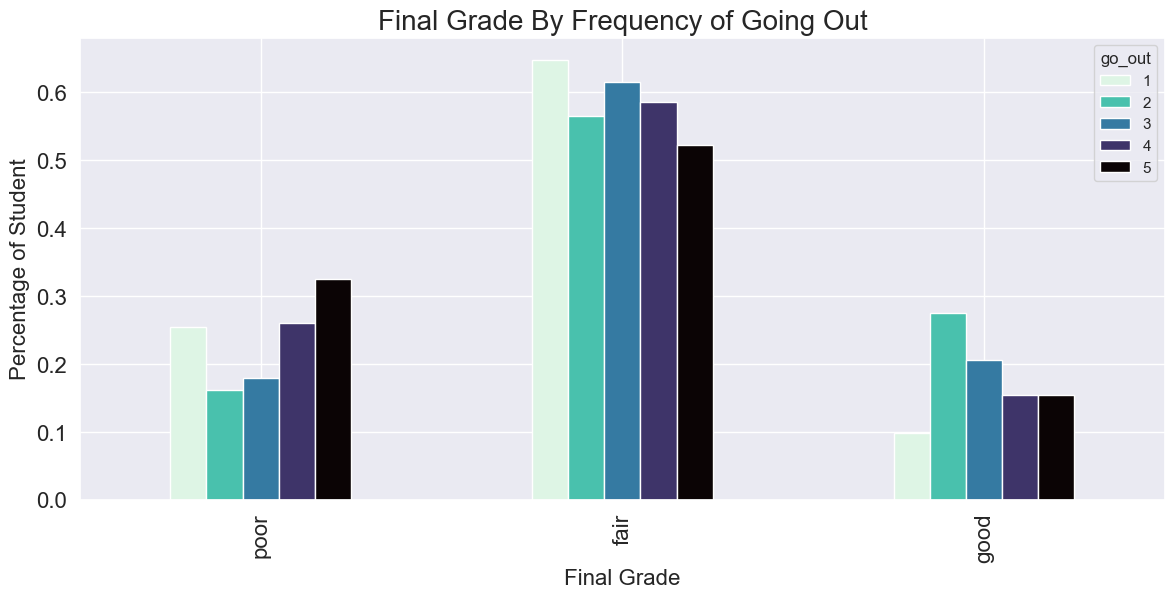

In [31]:
out_tab = pd.crosstab(index=df.final_grade, columns=df.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

- There exists a significant correlation between the frequency of socializing with friends and students' final performance.
- Restricting the frequency of socializing with friends results in a desired level of academic performance. 

### 4.7 Final Grade By Desire To Go To College

see how desire to go to college influence student final performance

Text(0.5, 0, 'Age')

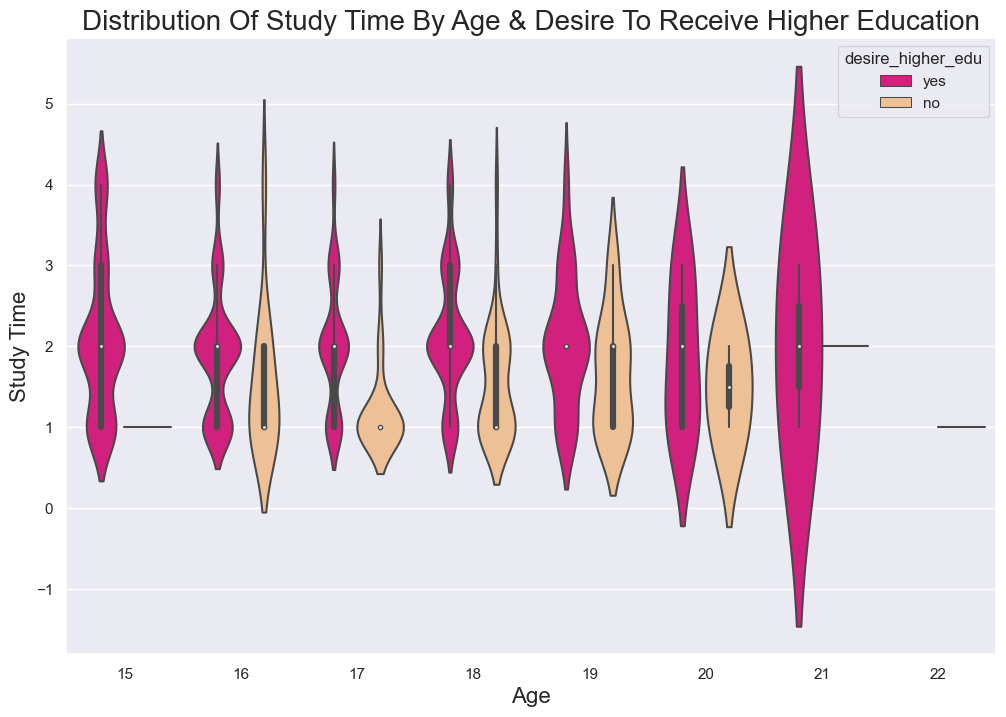

In [33]:
# Desire for higher education and study time by age 
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='study_time', hue='desire_higher_edu', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

- We can observe that as age increases, there is a greater inclination towards pursuing higher studies.
- In the age group of 16 years, a higher amount of study time is associated with a decreased tendency to pursue higher education.

In [34]:
higher_tab = pd.crosstab(index=df.final_grade, columns=df.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

Text(0, 0.5, 'Percentage of Student')

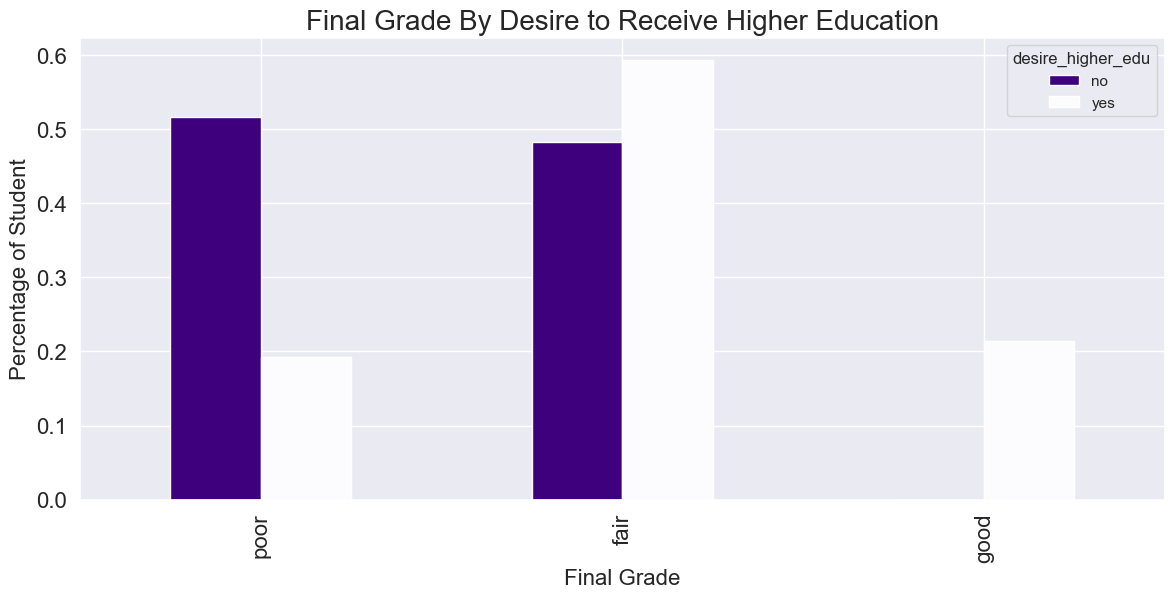

In [36]:
higher_perc.plot.bar(colormap="Purples_r", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

- All students who perform well academically demonstrate a desire to pursue higher education.
- The majority of fair students express a desire for higher education.
- Most poor students opt not to pursue higher education.

### 4.8 Final Grade By Living Area

see how the final performance difference between students living in the city and those living in rural areas

In [21]:
# living area: urban vs. rural
df.address = df.address.map({'U':'Urban', 'R':'Rural'})

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df.address, palette='Vega20b_r')
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

In [ ]:
ad_tab1 = pd.crosstab(index=df.final_grade, columns=df.address)
ad_tab = np.log(ad_tab1)
ad_perc = ad_tab.apply(perc).reindex(index)

In [ ]:
d_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

- A majority of the students belong to urban areas, and it is observed that urban students tend to have better academic performance.

# 5. Conclusion

- __Jupyter Notebook__ is commonly utilized for conducting __Exploratory Data Analysis__ (EDA) with the assistance of pandas profiling.
- We employed popular Python libraries such as __Pandas, NumP_._, as well as packages like __Matplotlib and Seaborn__ to gain deeper insights into the data
- The_ _preprocessing__ step facilitates a better understanding of missing values, outliers, and irregularities within the data, aiding in data analysis and interpretation.
- Additionally, we utilize the __pandas profiling__ feature to generate a comprehensive HTML report that encompasses all the information about the different features within the dataset.
- Furthermore, we gained knowledge on creating __new features__, which subsequently aids us in achieving improved prediction accuracy and performance.
- The majority of students have received a grade of __Fair__
- The romantic status exhibits a noteworthy correlation with the final grade
- We can also observe that students who perform well academically tend to have lower alcohol consumption levels, whereas students with poor or fair academic performance have higher levels of alcohol consumption.
- When comparing the educational backgrounds of both fathers and mothers, it becomes evident that the academic performance of students is greatly influenced by the mother's level of education.
- There exists a significant correlation between the frequency of socializing with friends and students' final performance.
- We can observe that as age increases, there is a greater inclination towards pursuing higher studies.
- A majority of the students belong to urban areas, and it is observed that urban students tend to have better academic performance.
- This analysis will assist us in selecting an appropriate __machine learning model__ to predict the performance of students.
